**Scatter plot**

In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/fastfood.csv')

In [4]:
df.isna().sum()

restaurant       0
item             0
calories         0
cal_fat          0
total_fat        0
sat_fat          0
trans_fat        0
cholesterol      0
sodium           0
total_carb       0
fiber           12
sugar            0
protein          1
vit_a          214
vit_c          210
calcium        210
salad            0
dtype: int64

In [5]:
median_vit_a = round(df['vit_a'].median(), 1)
median_vit_c = round(df['vit_c'].median(), 1)
median_calcium = round(df['calcium'].median(), 1)
median_vit_a, median_vit_c, median_calcium

(10.0, 10.0, 20.0)

In [6]:
df['vit_a'].fillna(median_vit_a, inplace=True)
df['vit_c'].fillna(median_vit_c, inplace=True)
df['calcium'].fillna(median_vit_a, inplace=True)
df_cleaned = df.dropna(subset=['fiber', 'protein'])
df_cleaned

,restaurant,item,calories,cal_fat,total_fat,sat_fat,trans_fat,cholesterol,sodium,total_carb,fiber,sugar,protein,vit_a,vit_c,calcium,salad
0,Mcdonalds,Artisan Grilled Chicken Sandwich,380,60,7,2.0,0.0,95,1110,44,3.0,11,37.0,4.0,20.0,20.0,Other
1,Mcdonalds,Single Bacon Smokehouse Burger,840,410,45,17.0,1.5,130,1580,62,2.0,18,46.0,6.0,20.0,20.0,Other
2,Mcdonalds,Double Bacon Smokehouse Burger,1130,600,67,27.0,3.0,220,1920,63,3.0,18,70.0,10.0,20.0,50.0,Other
3,Mcdonalds,Grilled Bacon Smokehouse Chicken Sandwich,750,280,31,10.0,0.5,155,1940,62,2.0,18,55.0,6.0,25.0,20.0,Other
4,Mcdonalds,Crispy Bacon Smokehouse Chicken Sandwich,920,410,45,12.0,0.5,120,1980,81,4.0,18,46.0,6.0,20.0,20.0,Other
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
510,Taco Bell,Spicy Triple Double Crunchwrap,780,340,38,10.0,0.5,50,1850,87,9.0,8,23.0,20.0,10.0,25.0,Other
511,Taco Bell,Express Taco Salad w/ Chips,580,260,29,9.0,1.0,60,1270,59,8.0,7,23.0,10.0,10.0,10.0,Other
512,Taco Bell,Fiesta Taco Salad-Beef,780,380,42,10.0,1.0,60,1340,74,11.0,7,26.0,10.0,10.0,10.0,Other
513,Taco Bell,Fiesta Taco Salad-Chicken,720,320,35,7.0,0.0,70,1260,70,8.0,8,32.0,10.0,10.0,10.0,Other


In [7]:
df_cleaned.isna().sum()

restaurant     0
item           0
calories       0
cal_fat        0
total_fat      0
sat_fat        0
trans_fat      0
cholesterol    0
sodium         0
total_carb     0
fiber          0
sugar          0
protein        0
vit_a          0
vit_c          0
calcium        0
salad          0
dtype: int64

In [8]:
df_seg = df_cleaned.drop(['restaurant','item','fiber','sodium','calories','cholesterol','sugar','vit_a','vit_c','calcium','salad','cal_fat','sat_fat','trans_fat'],axis='columns')
df_seg



,total_fat,total_carb,protein
0,7,44,37.0
1,45,62,46.0
2,67,63,70.0
3,31,62,55.0
4,45,81,46.0
...,...,...,...
510,38,87,23.0
511,29,59,23.0
512,42,74,26.0
513,35,70,32.0


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

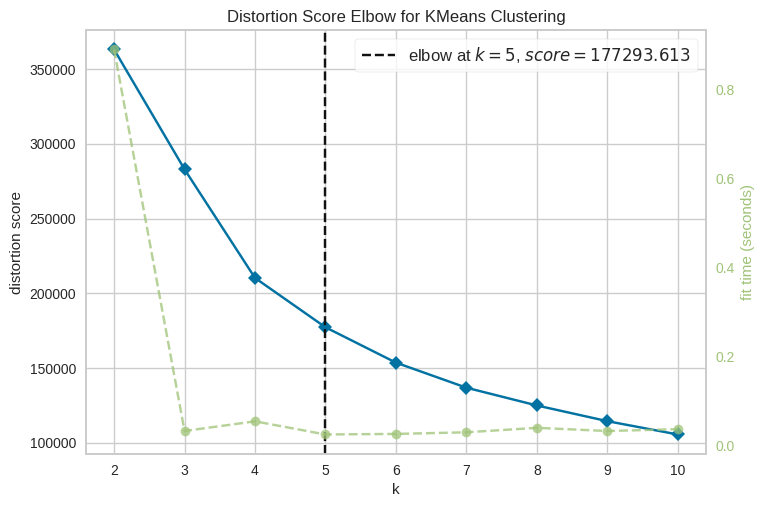

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [9]:
from yellowbrick.cluster import KElbowVisualizer 
model = KMeans()
visualizer = KElbowVisualizer(model, K=(1,10))
visualizer.fit(df_seg)
visualizer.show()

In [10]:
model = KMeans(n_clusters=5,init='k-means++',random_state=42)
model.fit(df_seg)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=5, random_state=42)

In [11]:
cluster_centers = model.cluster_centers_
cluster_centers

array([[115.5       ,  73.25      , 133.25      ],
       [ 14.68888889,  21.73333333,  17.1       ],
       [ 34.28333333,  95.        ,  42.38333333],
       [ 24.33009709,  50.24757282,  25.83495146],
       [ 55.49056604,  49.13207547,  46.45283019]])

In [12]:
labels = model.labels_

In [13]:
df_cleaned['labels'] = labels
df_cleaned

<ipython-input-13-3ccb3b7c1c2a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['labels'] = labels


,restaurant,item,calories,cal_fat,total_fat,sat_fat,trans_fat,cholesterol,sodium,total_carb,fiber,sugar,protein,vit_a,vit_c,calcium,salad,labels
0,Mcdonalds,Artisan Grilled Chicken Sandwich,380,60,7,2.0,0.0,95,1110,44,3.0,11,37.0,4.0,20.0,20.0,Other,3
1,Mcdonalds,Single Bacon Smokehouse Burger,840,410,45,17.0,1.5,130,1580,62,2.0,18,46.0,6.0,20.0,20.0,Other,4
2,Mcdonalds,Double Bacon Smokehouse Burger,1130,600,67,27.0,3.0,220,1920,63,3.0,18,70.0,10.0,20.0,50.0,Other,4
3,Mcdonalds,Grilled Bacon Smokehouse Chicken Sandwich,750,280,31,10.0,0.5,155,1940,62,2.0,18,55.0,6.0,25.0,20.0,Other,4
4,Mcdonalds,Crispy Bacon Smokehouse Chicken Sandwich,920,410,45,12.0,0.5,120,1980,81,4.0,18,46.0,6.0,20.0,20.0,Other,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
510,Taco Bell,Spicy Triple Double Crunchwrap,780,340,38,10.0,0.5,50,1850,87,9.0,8,23.0,20.0,10.0,25.0,Other,2
511,Taco Bell,Express Taco Salad w/ Chips,580,260,29,9.0,1.0,60,1270,59,8.0,7,23.0,10.0,10.0,10.0,Other,3
512,Taco Bell,Fiesta Taco Salad-Beef,780,380,42,10.0,1.0,60,1340,74,11.0,7,26.0,10.0,10.0,10.0,Other,2
513,Taco Bell,Fiesta Taco Salad-Chicken,720,320,35,7.0,0.0,70,1260,70,8.0,8,32.0,10.0,10.0,10.0,Other,3


In [14]:
df_seg2 = df_cleaned.drop(['fiber','sodium','calories','cholesterol','sugar','vit_a','vit_c','calcium','salad','cal_fat','sat_fat','trans_fat'],axis='columns')
df_seg2

,restaurant,item,total_fat,total_carb,protein,labels
0,Mcdonalds,Artisan Grilled Chicken Sandwich,7,44,37.0,3
1,Mcdonalds,Single Bacon Smokehouse Burger,45,62,46.0,4
2,Mcdonalds,Double Bacon Smokehouse Burger,67,63,70.0,4
3,Mcdonalds,Grilled Bacon Smokehouse Chicken Sandwich,31,62,55.0,4
4,Mcdonalds,Crispy Bacon Smokehouse Chicken Sandwich,45,81,46.0,2
...,...,...,...,...,...,...
510,Taco Bell,Spicy Triple Double Crunchwrap,38,87,23.0,2
511,Taco Bell,Express Taco Salad w/ Chips,29,59,23.0,3
512,Taco Bell,Fiesta Taco Salad-Beef,42,74,26.0,2
513,Taco Bell,Fiesta Taco Salad-Chicken,35,70,32.0,3


In [15]:
import seaborn as sn

In [16]:
label_0 = df_seg2[df_seg2['labels']==0]
label_1 = df_seg2[df_seg2['labels']==1]
label_2 = df_seg2[df_seg2['labels']==2]
label_3 = df_seg2[df_seg2['labels']==3]
label_4 = df_seg2[df_seg2['labels']==4]

print("label 0",len(label_0))
print("label 1",len(label_1))
print("label 2",len(label_2))
print("label 3",len(label_3))
print("label 4",len(label_4))


label 0 4
label 1 180
label 2 60
label 3 206
label 4 53


In [17]:
nutritions = list(label_0.describe().columns)
label_0_nutri_avg = label_0.describe().mean().values
label_1_nutri_avg = label_1.describe().mean().values
label_2_nutri_avg = label_2.describe().mean().values
label_3_nutri_avg = label_3.describe().mean().values
label_4_nutri_avg = label_4.describe().mean().values

print("label_0_nutri_avg",label_0_nutri_avg)
print("label_1_nutri_avg",label_1_nutri_avg)
print("label_2_nutri_avg",label_2_nutri_avg)
print("label_3_nutri_avg",label_3_nutri_avg)
print("label_4_nutri_avg",label_4_nutri_avg)


label_0_nutri_avg [ 90.00181102  60.38974591 105.202143     0.5       ]
label_1_nutri_avg [36.22267906 39.95258345 37.01979857 23.25      ]
label_2_nutri_avg [36.03450819 84.71792642 43.92062269  9.        ]
label_3_nutri_avg [45.34222676 65.27833331 46.91977523 28.        ]
label_4_nutri_avg [51.96520448 43.21325747 46.70454403  9.625     ]


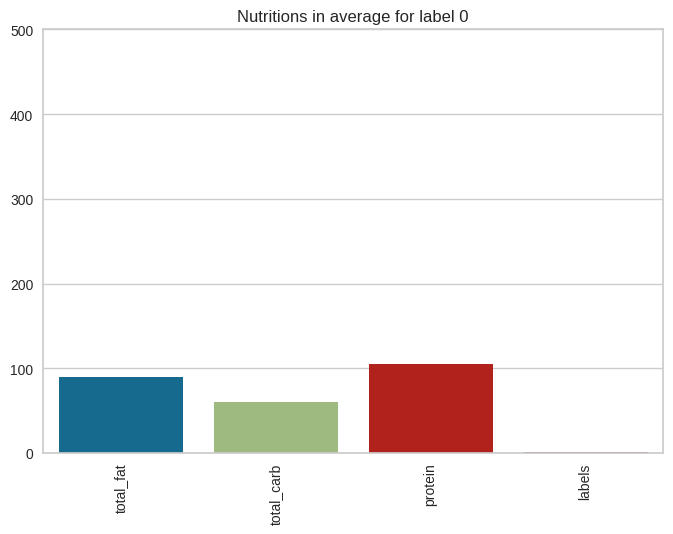

In [18]:
# label 0
sn.barplot(x=nutritions,y=label_0_nutri_avg)
plt.title("Nutritions in average for label 0")
plt.xticks(rotation=90)
plt.ylim([0,500])
plt.show()

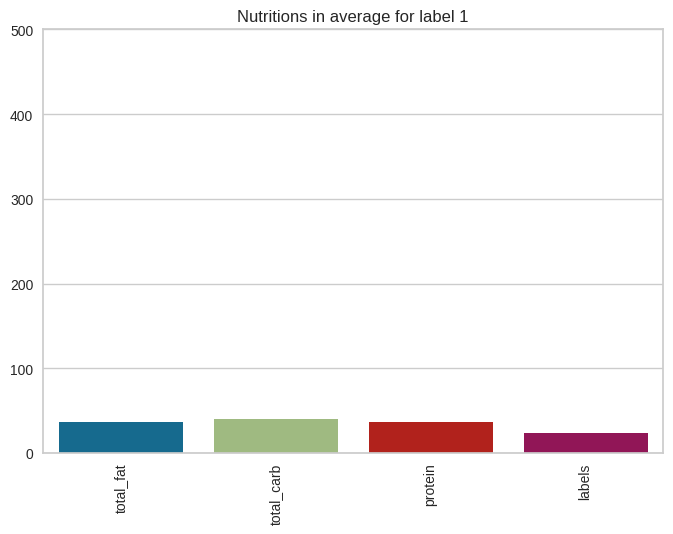

In [19]:
# label 1
sn.barplot(x=nutritions,y=label_1_nutri_avg)
plt.title("Nutritions in average for label 1")
plt.xticks(rotation=90)
plt.ylim([0,500])
plt.show()

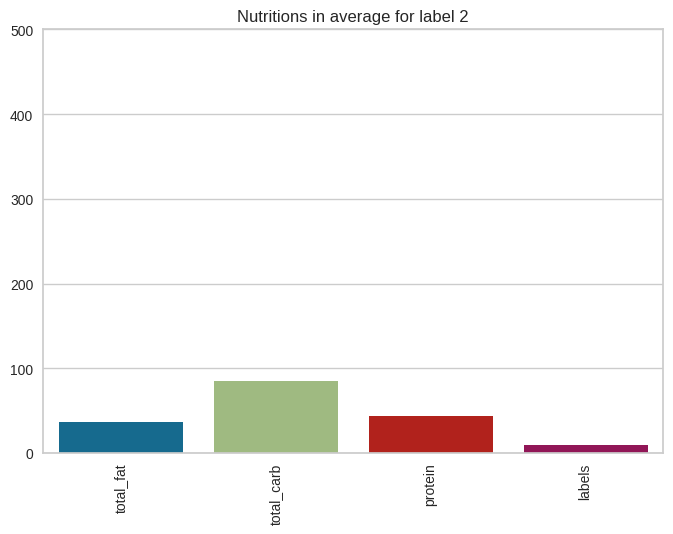

In [20]:
# label 2
sn.barplot(x=nutritions,y=label_2_nutri_avg)
plt.title("Nutritions in average for label 2")
plt.xticks(rotation=90)
plt.ylim([0,500])
plt.show()

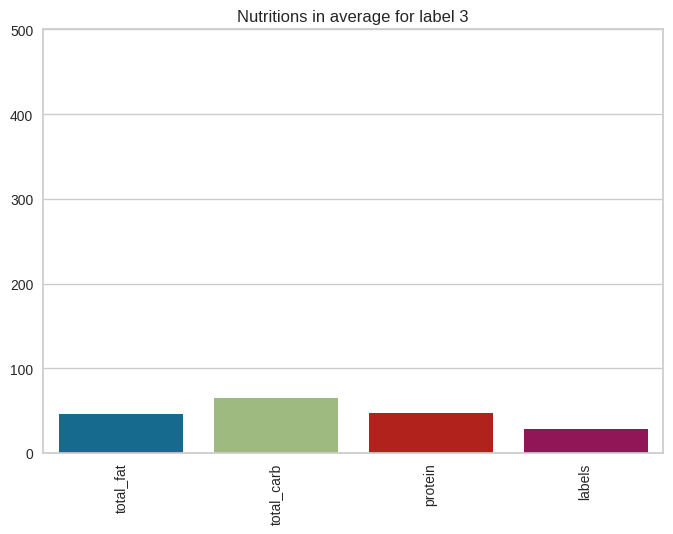

In [21]:
# label 3
sn.barplot(x=nutritions,y=label_3_nutri_avg)
plt.title("Nutritions in average for label 3")
plt.xticks(rotation=90)
plt.ylim([0,500])
plt.show()

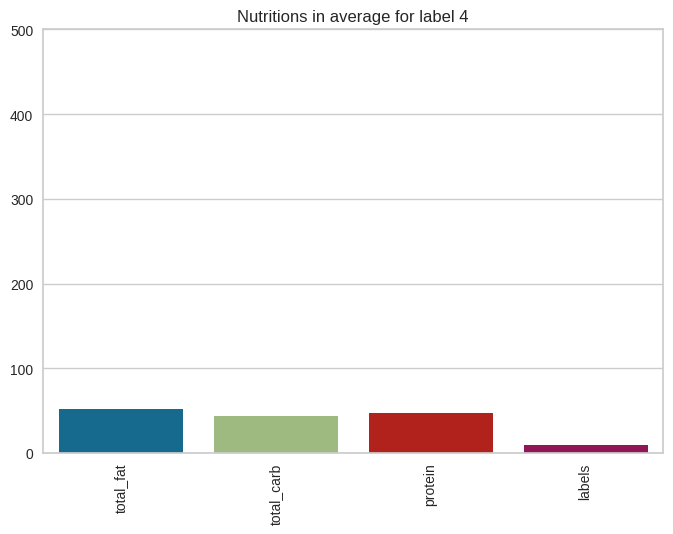

In [22]:
# label 4
sn.barplot(x=nutritions,y=label_4_nutri_avg)
plt.title("Nutritions in average for label 4")
plt.xticks(rotation=90)
plt.ylim([0,500])
plt.show()

In [23]:
df_seg2[df_seg2['labels']==0]

,restaurant,item,total_fat,total_carb,protein,labels
38,Mcdonalds,12 piece Buttermilk Crispy Chicken Tenders,88,64,115.0,0
39,Mcdonalds,20 piece Buttermilk Crispy Chicken Tenders,141,103,186.0,0
44,Mcdonalds,40 piece Chicken McNuggets,107,105,98.0,0
192,Burger King,American Brewhouse King,126,21,134.0,0


In [24]:
mean_fat0= label_0['total_fat'].mean()
mean_carb0=label_0['total_carb'].mean()
mean_protein0=label_0['protein'].mean()
max_fat0= label_0['total_fat'].max()
max_carb0=label_0['total_carb'].max()
max_protein0=label_0['protein'].max()
min_fat0= label_0['total_fat'].min()
min_carb0=label_0['total_carb'].min()
min_protein0=label_0['protein'].min()

print("mean fat of label 0 = ",mean_fat0)
print("min fat of label 0 = ",min_fat0)
print("max fat of label 0 = ",max_fat0)

print("mean carb of label 0 = ",mean_carb0)
print("min carb of label 0 = ",min_carb0)
print("max carb of label 0 = ",max_carb0)

print("mean protein of label 0 = ",mean_protein0)
print("min protein of label 0 = ",min_protein0)
print("max protein of label 0 = ",max_protein0)

mean fat of label 0 =  115.5
min fat of label 0 =  88
max fat of label 0 =  141
mean carb of label 0 =  73.25
min carb of label 0 =  21
max carb of label 0 =  105
mean protein of label 0 =  133.25
min protein of label 0 =  98.0
max protein of label 0 =  186.0


In [25]:
df_seg2[df_seg2['labels']==1]

,restaurant,item,total_fat,total_carb,protein,labels
6,Mcdonalds,Cheeseburger,12,33,15.0,1
10,Mcdonalds,Filet-O-Fish®,18,38,15.0,1
14,Mcdonalds,Hamburger,8,31,13.0,1
15,Mcdonalds,Lobster Roll,5,35,24.0,1
20,Mcdonalds,McDouble,18,34,23.0,1
...,...,...,...,...,...,...
493,Taco Bell,Chipotle Crispy Chicken Griller,18,22,9.0,1
496,Taco Bell,Double Tostada,11,32,12.0,1
500,Taco Bell,MexiMelt®,14,21,14.0,1
504,Taco Bell,Shredded Chicken Mini Quesadilla,8,15,12.0,1


In [26]:
mean_fat1= label_1['total_fat'].mean()
mean_carb1=label_1['total_carb'].mean()
mean_protein1=label_1['protein'].mean()
max_fat1= label_1['total_fat'].max()
max_carb1=label_1['total_carb'].max()
max_protein1=label_1['protein'].max()
min_fat1= label_1['total_fat'].min()
min_carb1=label_1['total_carb'].min()
min_protein1=label_1['protein'].min()

print("mean fat of label 1 = ",mean_fat1)
print("min fat of label 1 = ",min_fat1)
print("max fat of label 1 = ",max_fat1)

print("mean carb of label 1 = ",mean_carb1)
print("min carb of label 1 = ",min_carb1)
print("max carb of label 1 = ",max_carb1)

print("mean protein of label 1 = ",mean_protein1)
print("min protein of label 1 = ",min_protein1)
print("max protein of label 1 = ",max_protein1)

mean fat of label 1 =  14.688888888888888
min fat of label 1 =  0
max fat of label 1 =  45
mean carb of label 1 =  21.733333333333334
min carb of label 1 =  0
max carb of label 1 =  44
mean protein of label 1 =  17.1
min protein of label 1 =  1.0
max protein of label 1 =  42.0


In [27]:
df_seg2[df_seg2['labels']==2]

,restaurant,item,total_fat,total_carb,protein,labels
4,Mcdonalds,Crispy Bacon Smokehouse Chicken Sandwich,45,81,46.0,2
30,Mcdonalds,Crispy Signature Sriracha Chicken Sandwich,33,75,32.0,2
33,Mcdonalds,Crispy Sweet BBQ Bacon Chicken Sandwich,36,80,39.0,2
46,Mcdonalds,6 piece Sweet N' Spicy Honey BBQ Glazed Tenders,40,94,58.0,2
47,Mcdonalds,10 piece Sweet N' Spicy Honey BBQ Glazed Tenders,66,156,97.0,2
120,Sonic,3 Piece Super Crunch Chicken Strip Dinner,46,109,30.0,2
121,Sonic,4 Piece Super Crunch Chicken Strip Dinner,51,118,37.0,2
122,Sonic,5 Piece Super Crunch Chicken Strip Dinner,57,126,44.0,2
160,Arbys,Pecan Chicken Salad Sandwich,44,81,33.0,2
166,Arbys,Roast Turkey & Swiss Sandwich,28,79,38.0,2


In [28]:
mean_fat2= label_2['total_fat'].mean()
mean_carb2=label_2['total_carb'].mean()
mean_protein2=label_2['protein'].mean()
max_fat2= label_2['total_fat'].max()
max_carb2=label_2['total_carb'].max()
max_protein2=label_2['protein'].max()
min_fat2= label_2['total_fat'].min()
min_carb2=label_2['total_carb'].min()
min_protein2=label_2['protein'].min()

print("mean fat of label 2 = ",mean_fat2)
print("min fat of label 2 = ",min_fat2)
print("max fat of label 2 = ",max_fat2)

print("mean carb of label 2 = ",mean_carb2)
print("min carb of label 2 = ",min_carb2)
print("max carb of label 2 = ",max_carb2)

print("mean protein of label 2 = ",mean_protein2)
print("min protein of label 2 = ",min_protein2)
print("max protein of label 2 = ",max_protein2)

mean fat of label 2 =  34.28333333333333
min fat of label 2 =  6
max fat of label 2 =  66
mean carb of label 2 =  95.0
min carb of label 2 =  74
max carb of label 2 =  156
mean protein of label 2 =  42.38333333333333
min protein of label 2 =  16.0
max protein of label 2 =  97.0


In [29]:
df_seg2[df_seg2['labels']==3]

,restaurant,item,total_fat,total_carb,protein,labels
0,Mcdonalds,Artisan Grilled Chicken Sandwich,7,44,37.0,3
5,Mcdonalds,Big Mac,28,46,25.0,3
7,Mcdonalds,Classic Chicken Sandwich,24,49,25.0,3
8,Mcdonalds,Double Cheeseburger,21,35,25.0,3
11,Mcdonalds,Garlic White Cheddar Burger,34,48,32.0,3
...,...,...,...,...,...,...
507,Taco Bell,Stacker,18,39,18.0,3
508,Taco Bell,Steak Quesadilla,28,41,25.0,3
511,Taco Bell,Express Taco Salad w/ Chips,29,59,23.0,3
513,Taco Bell,Fiesta Taco Salad-Chicken,35,70,32.0,3


In [30]:
mean_fat3= label_3['total_fat'].mean()
mean_carb3=label_3['total_carb'].mean()
mean_protein3=label_3['protein'].mean()
max_fat3= label_3['total_fat'].max()
max_carb3=label_3['total_carb'].max()
max_protein3=label_3['protein'].max()
min_fat3= label_3['total_fat'].min()
min_carb3=label_3['total_carb'].min()
min_protein3=label_3['protein'].min()

print("mean fat of label 3 = ",mean_fat3)
print("min fat of label 3 = ",min_fat3)
print("max fat of label 3 = ",max_fat3)

print("mean carb of label 3 = ",mean_carb3)
print("min carb of label 3 = ",min_carb3)
print("max carb of label 3 = ",max_carb3)

print("mean protein of label 3 = ",mean_protein3)
print("min protein of label 3 = ",min_protein3)
print("max protein of label 3 = ",max_protein3)

mean fat of label 3 =  24.33009708737864
min fat of label 3 =  4
max fat of label 3 =  46
mean carb of label 3 =  50.24757281553398
min carb of label 3 =  33
max carb of label 3 =  76
mean protein of label 3 =  25.83495145631068
min protein of label 3 =  11.0
max protein of label 3 =  48.0


In [31]:
df_seg2[df_seg2['labels']==4]

,restaurant,item,total_fat,total_carb,protein,labels
1,Mcdonalds,Single Bacon Smokehouse Burger,45,62,46.0,4
2,Mcdonalds,Double Bacon Smokehouse Burger,67,63,70.0,4
3,Mcdonalds,Grilled Bacon Smokehouse Chicken Sandwich,31,62,55.0,4
9,Mcdonalds,Double Quarter Pounder® with Cheese,45,42,51.0,4
36,Mcdonalds,6 piece Buttermilk Crispy Chicken Tenders,44,32,58.0,4
37,Mcdonalds,10 piece Buttermilk Crispy Chicken Tenders,70,52,94.0,4
43,Mcdonalds,20 Piece Chicken McNuggets,53,53,49.0,4
69,Chick Fil-A,30 piece Chicken Nuggets,46,35,103.0,4
84,Sonic,Hatch Green Chile Cheeseburger,43,44,35.0,4
91,Sonic,Sonic Bacon Cheeseburger (w/mayo),59,45,39.0,4


In [32]:
mean_fat4= label_4['total_fat'].mean()
mean_carb4=label_4['total_carb'].mean()
mean_protein4=label_4['protein'].mean()
max_fat4= label_4['total_fat'].max()
max_carb4=label_4['total_carb'].max()
max_protein4=label_4['protein'].max()
min_fat4= label_4['total_fat'].min()
min_carb4=label_4['total_carb'].min()
min_protein4=label_4['protein'].min()

print("mean fat of label 4 = ",mean_fat4)
print("min fat of label 4= ",min_fat4)
print("max fat of label 4 = ",max_fat4)

print("mean carb of label 4 = ",mean_carb4)
print("min carb of label 4 = ",min_carb4)
print("max carb of label 4 = ",max_carb4)

print("mean protein of label 4 = ",mean_protein4)
print("min protein of label 4 = ",min_protein4)
print("max protein of label 4 = ",max_protein4)

mean fat of label 4 =  55.490566037735846
min fat of label 4=  31
max fat of label 4 =  100
mean carb of label 4 =  49.132075471698116
min carb of label 4 =  18
max carb of label 4 =  70
mean protein of label 4 =  46.45283018867924
min protein of label 4 =  22.0
max protein of label 4 =  103.0


In [33]:
df_seg2['women_nutri_classification'] = df_seg2['labels'].map({0: 'Unhealthy', 1: 'Healthy',2: 'Unhealthy', 3: 'Healthy', 4: 'Unhealthy'})
df_seg2['men_nutri_classification'] = df_seg2['labels'].map({0: 'Unhealthy', 1: 'Healthy',2: 'Unhealthy', 3: 'Healthy', 4: 'Unhealthy'})
df_seg2


,restaurant,item,total_fat,total_carb,protein,labels,women_nutri_classification,men_nutri_classification
0,Mcdonalds,Artisan Grilled Chicken Sandwich,7,44,37.0,3,Healthy,Healthy
1,Mcdonalds,Single Bacon Smokehouse Burger,45,62,46.0,4,Unhealthy,Unhealthy
2,Mcdonalds,Double Bacon Smokehouse Burger,67,63,70.0,4,Unhealthy,Unhealthy
3,Mcdonalds,Grilled Bacon Smokehouse Chicken Sandwich,31,62,55.0,4,Unhealthy,Unhealthy
4,Mcdonalds,Crispy Bacon Smokehouse Chicken Sandwich,45,81,46.0,2,Unhealthy,Unhealthy
...,...,...,...,...,...,...,...,...
510,Taco Bell,Spicy Triple Double Crunchwrap,38,87,23.0,2,Unhealthy,Unhealthy
511,Taco Bell,Express Taco Salad w/ Chips,29,59,23.0,3,Healthy,Healthy
512,Taco Bell,Fiesta Taco Salad-Beef,42,74,26.0,2,Unhealthy,Unhealthy
513,Taco Bell,Fiesta Taco Salad-Chicken,35,70,32.0,3,Healthy,Healthy


In [34]:
wm_healthy = df_seg2[df_seg2['women_nutri_classification']=='Healthy']
wm_unhealthy = df_seg2[df_seg2['women_nutri_classification']=='Unhealthy']
m_healthy = df_seg2[df_seg2['men_nutri_classification']=='Healthy']
m_unhealthy = df_seg2[df_seg2['men_nutri_classification']=='Unhealthy']
print("wm_healthy",len(wm_healthy))
print("wm_unhealthy",len(wm_unhealthy))
print("m_healthy",len(m_healthy))
print("m_unhealthy",len(m_unhealthy))

wm_healthy 386
wm_unhealthy 117
m_healthy 386
m_unhealthy 117


<Axes: >

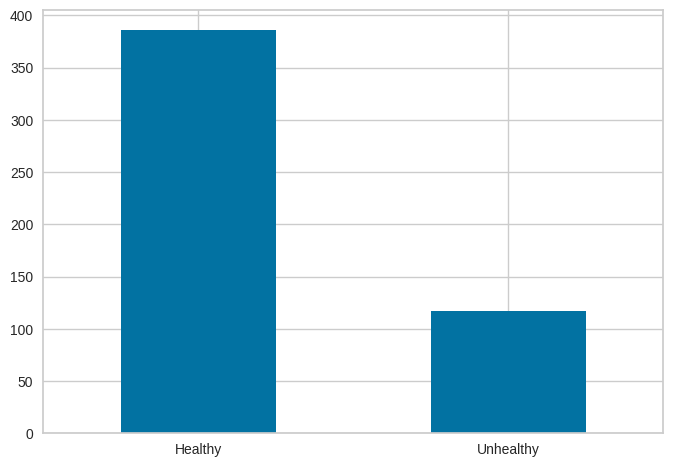

In [35]:
df_seg2['women_nutri_classification'].value_counts().plot(kind='bar', rot=0)

<Axes: >

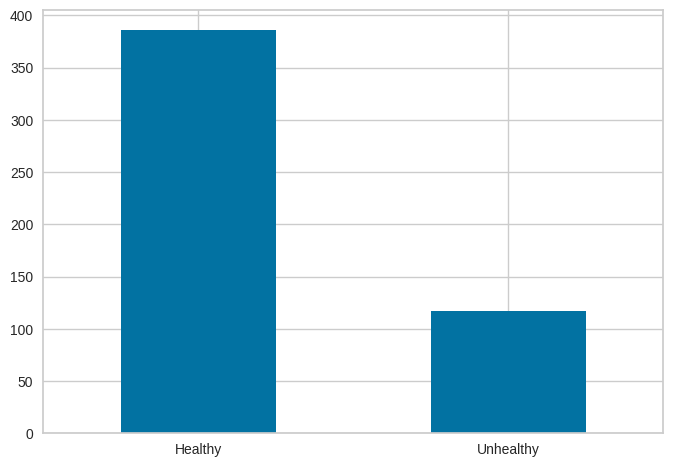

In [36]:
df_seg2['men_nutri_classification'].value_counts().plot(kind='bar', rot=0)

In [ ]:
df_seg2.to_csv('Book2.csv')